In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('data/FPT.csv', parse_dates=['Date/Time'], index_col='Date/Time')
df.drop(columns=['Ticker','Open Interest'], inplace=True)

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 97406 entries, 2018-12-25 09:15:00 to 2020-12-22 14:46:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    97406 non-null  float64
 1   High    97406 non-null  float64
 2   Low     97406 non-null  float64
 3   Close   97406 non-null  float64
 4   Volume  97406 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 4.5 MB
None
                      Open   High    Low  Close  Volume
Date/Time                                              
2018-12-25 09:15:00  30.89  30.89  30.89  30.89   35410
2018-12-25 09:16:00  30.81  30.81  30.81  30.81     190
2018-12-25 09:17:00  30.74  30.81  30.74  30.74    1120
2018-12-25 09:18:00  30.74  30.74  30.74  30.74    2120
2018-12-25 09:19:00  30.74  30.74  30.74  30.74   22500


Data Cleaning

In [25]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [26]:
df.fillna(method='ffill', inplace=True)


C:\Users\Vinh Nguyen\AppData\Local\Temp\ipykernel_4164\4000742557.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Feature Engineering

In [35]:
log_returns = np.log(df[['Open', 'High', 'Low', 'Close']] / df[['Open', 'High', 'Low', 'Close']].shift(1))


In [36]:
print("Summary Statistics:\n", log_returns.describe())

Summary Statistics:
                Open          High           Low         Close
count  97405.000000  97405.000000  97405.000000  97405.000000
mean       0.000006      0.000006      0.000006      0.000006
std        0.001430      0.001350      0.001399      0.001416
min       -0.062240     -0.059970     -0.062240     -0.059970
25%        0.000000      0.000000      0.000000      0.000000
50%        0.000000      0.000000      0.000000      0.000000
75%        0.000000      0.000000      0.000000      0.000000
max        0.035537      0.035537      0.035537      0.035537


EDA

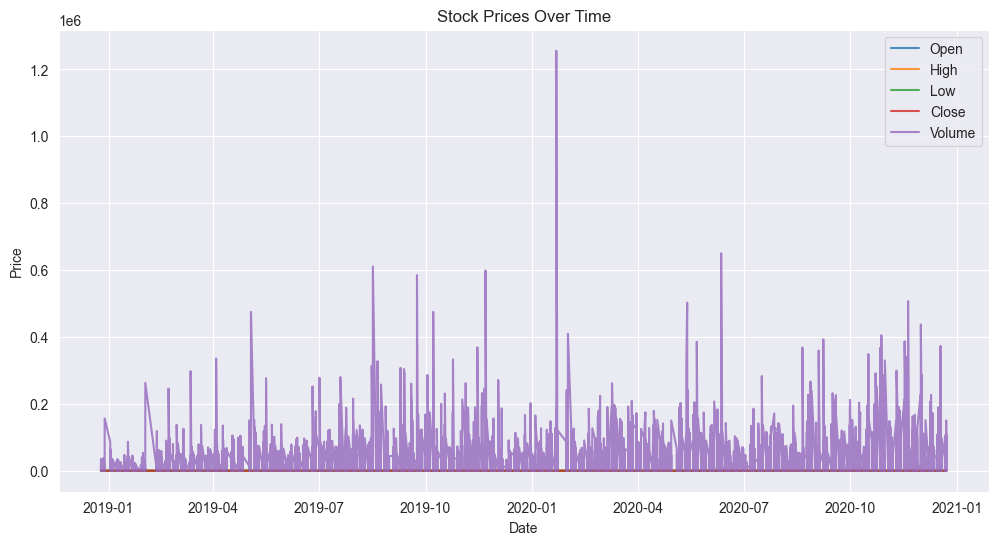

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df, alpha=0.8)
plt.title("Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(df.columns)
plt.show()

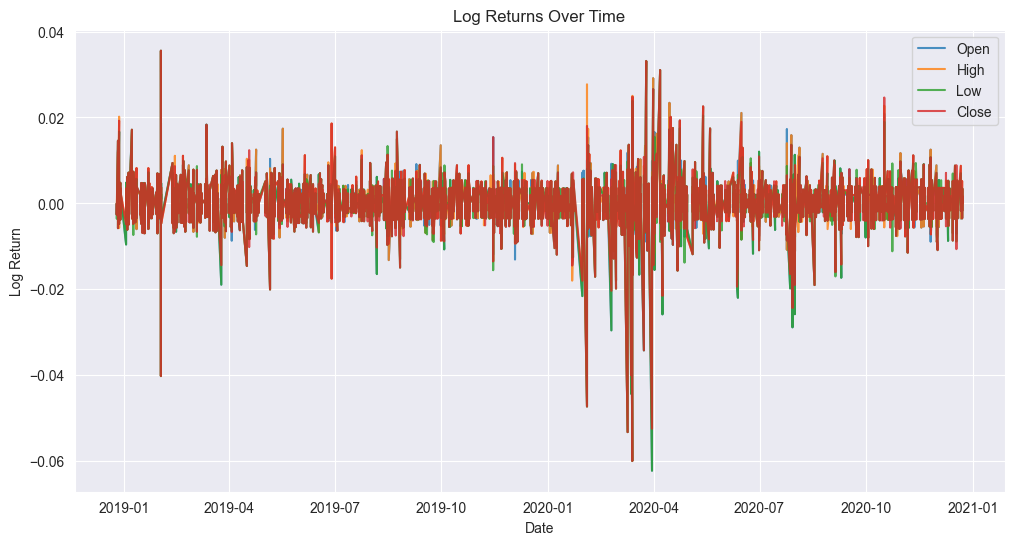

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(log_returns, alpha=0.8)
plt.title("Log Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend(log_returns.columns)
plt.show()

In [39]:
rolling_window = 30
rolling_mean = log_returns.rolling(rolling_window).mean()
rolling_volatility = log_returns.rolling(rolling_window).std()

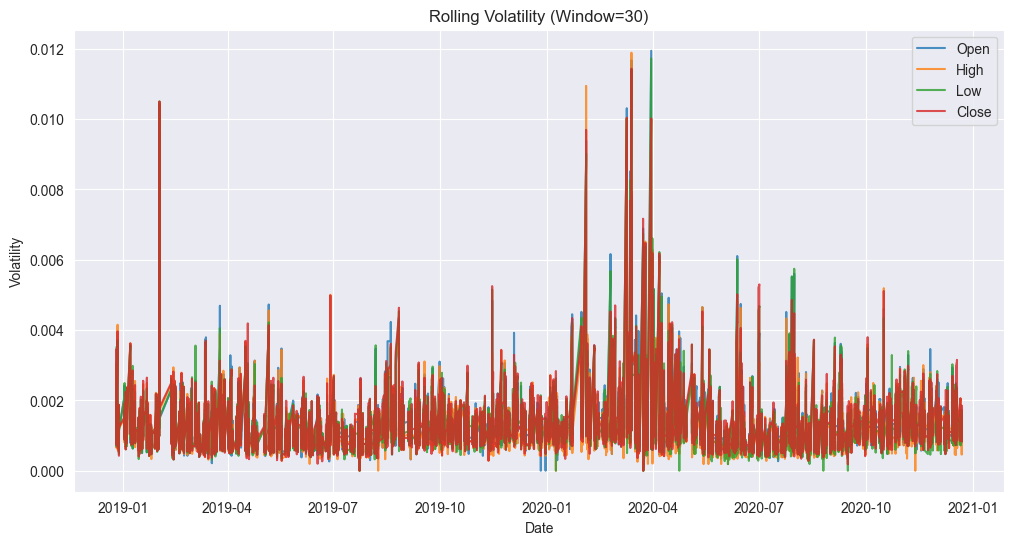

In [40]:
#rolling volatility
plt.figure(figsize=(12, 6))
plt.plot(rolling_volatility, alpha=0.8)
plt.title(f"Rolling Volatility (Window={rolling_window})")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend(log_returns.columns)
plt.show()

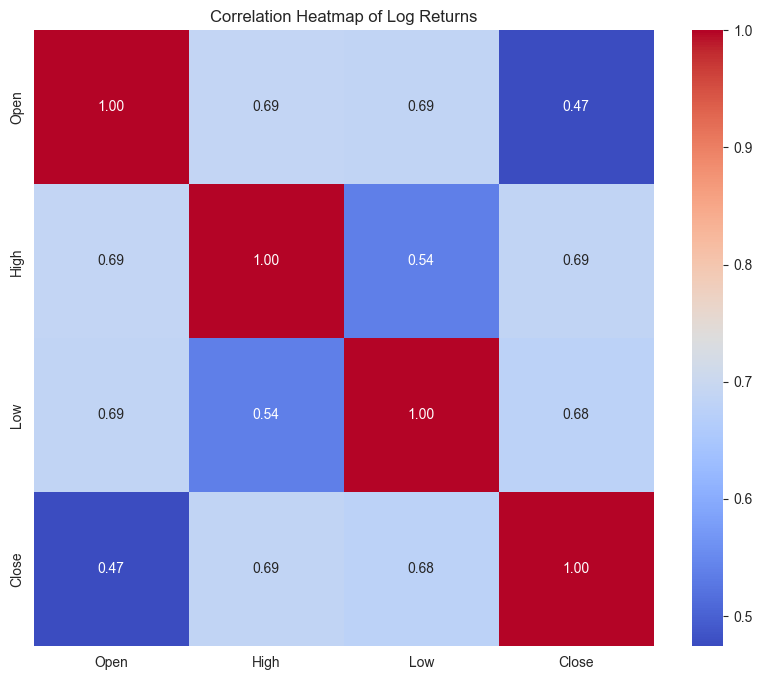

In [41]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(log_returns.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Log Returns")
plt.show()

In [42]:
#check skewness
print("Skewness:\n", log_returns.skew())
print("Kurtosis:\n", log_returns.kurt())

Skewness:
 Open    -2.771657
High    -2.065608
Low     -3.262697
Close   -2.223236
dtype: float64
Kurtosis:
 Open     151.934175
High     157.415489
Low      163.616460
Close    130.309546
dtype: float64
